In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import metrics
import collection
import seaborn as sns

In [2]:
obs=pd.read_csv('../data/box_samples.csv',index_col=0)
obs.describe()

/Users/terrylines/Documents/GNSS/gnssmapper/.venv/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,x,y,w,z,a,b,d_ray,d_building,az,el
count,9.818701e+06,9.818701e+06,532792.000000,532792.000000,532792.000000,532792.000000,532792.000000,9.818701e+06,532792.000000,9.818701e+06
mean,5.280000e+05,1.829999e+05,19.225797,30.865144,527999.809649,182999.615546,35.612939,4.358095e+01,170.401776,2.927098e+01
std,3.760252e+01,3.759663e+01,11.006808,54.873598,4.157526,3.981664,21.261409,1.800211e+01,106.283867,2.220401e+01
min,5.279350e+05,1.829350e+05,0.000013,1.000002,527995.000000,182995.000000,0.000150,0.000000e+00,0.000457,2.719667e-07
25%,5.279673e+05,1.829673e+05,10.005094,5.050877,527995.000000,182995.000000,17.498588,3.073431e+01,63.631802,1.052315e+01
50%,5.280001e+05,1.829999e+05,19.285310,13.661564,527999.598747,182999.290685,35.083603,4.560400e+01,162.211845,2.420838e+01
75%,5.280326e+05,1.830325e+05,27.995479,33.269313,528004.997074,183003.921032,52.673070,5.722422e+01,278.323853,4.470096e+01
max,5.280650e+05,1.830650e+05,39.999787,982.105718,528005.000000,183005.000000,91.102705,8.476163e+01,359.999369,8.499999e+01


In [108]:
metrics.int_metric(obs.z,10,4)

116647

10 million obs give 500k that intersect, and 116k with an I_4 metric

In [4]:
bounds=[np.floor(obs.x.min()),np.floor(obs.y.min()),np.ceil(obs.x.max()),np.ceil(obs.y.max())]

In [5]:
bounds

[527935.0, 182935.0, 528066.0, 183065.0]

In [6]:
observations_plot=collection.create_image(obs.x,obs.y,np.ones_like(obs.x),0.5,bounds,mean=False)
np.nanmean(observations_plot)/np.nanstd(observations_plot)

7.430265088676925

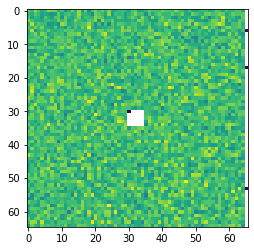

In [7]:
plt.imshow(observations_plot)

In [8]:
pd.DataFrame(observations_plot.flatten()).describe()

,0
count,4204.000000
mean,2335.561608
std,314.368250
min,35.000000
25%,2126.000000
50%,2331.000000
75%,2539.000000
max,3374.000000


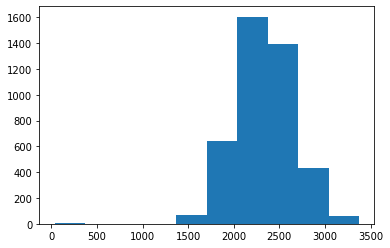

In [9]:
plt.hist(observations_plot.flatten())
plt.show()

Normally distributed number of observations in each cell

In [10]:
intersection_plot=collection.create_image(obs.x,obs.y,~obs.z.isna(),0.5,bounds,mean=True)

In [11]:
pd.DataFrame(intersection_plot.flatten()).describe()

,0
count,4204.000000
mean,0.054219
std,0.050112
min,0.000000
25%,0.028123
50%,0.040298
75%,0.061728
max,1.000000


<AxesSubplot:ylabel='Count'>

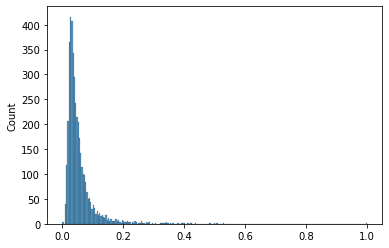

In [12]:
sns.histplot(intersection_plot.flatten())

/var/folders/kr/9rjggpcj2qx4ndk46ffx_t8w0000gn/T/ipykernel_88746/1612888096.py:1: RuntimeWarning: divide by zero encountered in log
  a=np.log(intersection_plot)


<AxesSubplot:ylabel='Count'>

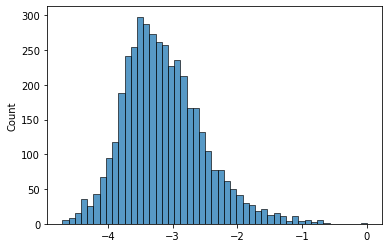

In [13]:
a=np.log(intersection_plot)
a=np.ma.masked_invalid(a)
sns.histplot(a.flatten())

lognormal distribution of intersection

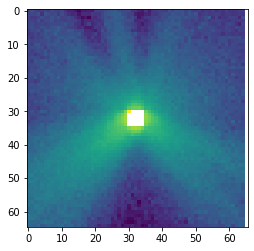

In [106]:
plt.imshow(a)

Spatial correlation of observation effectiveness. Being closer is better. Directly south is bad, but se and sw is good.

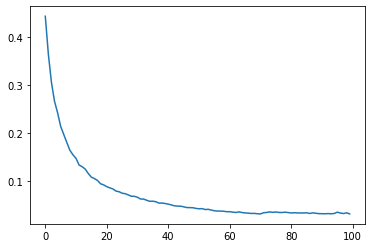

In [34]:
plt.plot((1-obs.z.isna()).groupby(pd.cut(obs.d_building,100)).mean())

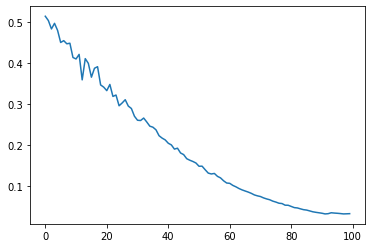

In [73]:
plt.plot((1-obs.z.isna()).groupby(pd.cut(np.log(1+obs.d_building),100)).mean())

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [52]:
obs['i']=1-obs.z.isna()
obs

,x,y,w,z,a,b,d_ray,d_building,az,el,i
0,527988.258896,182938.021189,NaN,NaN,NaN,NaN,NaN,57.376191,NaN,11.311725,0
1,527988.258896,182938.021189,NaN,NaN,NaN,NaN,NaN,57.376191,NaN,28.868598,0
2,527988.258896,182938.021189,NaN,NaN,NaN,NaN,NaN,57.376191,NaN,6.017766,0
3,527988.258896,182938.021189,NaN,NaN,NaN,NaN,NaN,57.376191,NaN,48.477686,0
4,527988.258896,182938.021189,NaN,NaN,NaN,NaN,NaN,57.376191,NaN,17.981631,0
...,...,...,...,...,...,...,...,...,...,...,...
9818696,527977.407625,182953.057888,NaN,NaN,NaN,NaN,NaN,45.482221,NaN,27.542246,0
9818697,527977.407625,182953.057888,NaN,NaN,NaN,NaN,NaN,45.482221,NaN,13.049657,0
9818698,527977.407625,182953.057888,NaN,NaN,NaN,NaN,NaN,45.482221,NaN,2.064660,0
9818699,527977.407625,182953.057888,NaN,NaN,NaN,NaN,NaN,45.482221,NaN,46.585817,0


In [54]:
m1 = smf.logit('i ~ I(np.log(1+d_building))',data =obs).fit()

Optimization terminated successfully.
         Current function value: 0.199660
         Iterations 7


In [56]:
print(m1.summary())

                           Logit Regression Results                           
Dep. Variable:                      i   No. Observations:              9818701
Model:                          Logit   Df Residuals:                  9818699
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Jul 2021   Pseudo R-squ.:                 0.05321
Time:                        11:23:48   Log-Likelihood:            -1.9604e+06
converged:                       True   LL-Null:                   -2.0706e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.1713      0.006     29.294      0.000       0.160       0.183
I(np.log(1 + d_building))    -0.8640      0.002   -506.566      0.000      -0.867     

In [75]:
m2=smf.glm('i ~ I(np.log(1+d_building))',data =obs,family=sm.families.Binomial()).fit()
print(m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      i   No. Observations:              9818701
Model:                            GLM   Df Residuals:                  9818699
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9604e+06
Date:                Thu, 15 Jul 2021   Deviance:                   3.9208e+06
Time:                        11:37:55   Pearson chi2:                 9.84e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

(array([8.540803e+06, 8.448400e+05, 2.190120e+05, 9.313300e+04,
        4.713600e+04, 3.075800e+04, 1.616000e+04, 1.141600e+04,
        8.842000e+03, 6.601000e+03]),
 array([0.02472547, 0.07652563, 0.12832579, 0.18012595, 0.23192611,
        0.28372627, 0.33552643, 0.38732659, 0.43912676, 0.49092692,
        0.54272708]),
 <BarContainer object of 10 artists>)

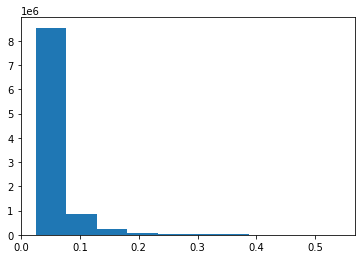

In [79]:
plt.hist(m2.fittedvalues)

In [80]:
intersection_fitted_plot=collection.create_image(obs.x,obs.y,m2.fittedvalues,0.5,bounds,mean=True)

In [81]:
pd.DataFrame(intersection_fitted_plot.flatten()).describe()

,0
count,4204.000000
mean,0.054256
std,0.042878
min,0.025012
25%,0.034256
50%,0.041205
75%,0.056116
max,0.542727


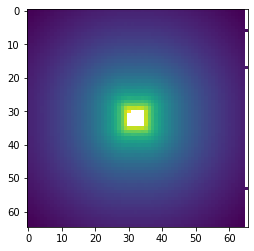

In [84]:
plt.imshow(np.log(intersection_fitted_plot))

In [85]:
intersection_residuals_plot=collection.create_image(obs.x,obs.y,1-obs.z.isna()-m2.fittedvalues,0.5,bounds,mean=True)

In [87]:
pd.DataFrame(intersection_residuals_plot.flatten()).describe()

,0
count,4204.000000
mean,-0.000037
std,0.024332
min,-0.181144
25%,-0.012691
50%,-0.005845
75%,0.011246
max,0.457273


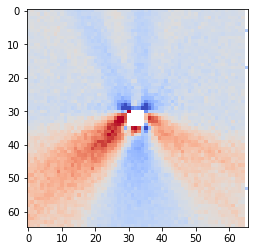

In [97]:
plt.imshow(intersection_residuals_plot,cmap='coolwarm',vmin=-0.1,vmax=0.1)

We also need to consider the effect of building height.


In [100]:
from metrics import _indicator as indicator
obs['i_4']=indicator(obs.z,10,4).astype('int')

In [104]:
obs[['i','i_4']].describe()

,i,i_4
count,9.818701e+06,9.818701e+06
mean,5.426298e-02,1.188008e-02
std,2.265359e-01,1.083464e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [109]:
i_4_plot=collection.create_image(obs.x,obs.y,indicator(obs.z,10,4).astype('int'),0.5,bounds,mean=True)

In [116]:
pd.DataFrame(i_4_plot.flatten()).describe()

,0
count,4204.000000
mean,0.011817
std,0.012758
min,0.000000
25%,0.004082
50%,0.007182
75%,0.014093
max,0.096422


/var/folders/kr/9rjggpcj2qx4ndk46ffx_t8w0000gn/T/ipykernel_88746/3748555608.py:1: RuntimeWarning: divide by zero encountered in log
  a=np.log(i_4_plot)


<AxesSubplot:ylabel='Count'>

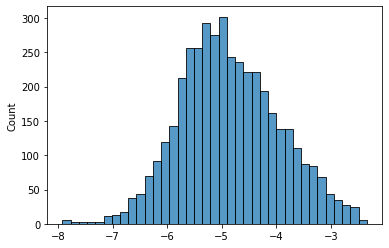

In [136]:
a=np.log(i_4_plot)
a=np.ma.masked_invalid(a)
sns.histplot(a.flatten())

In [138]:
a[a.mask]=np.random.uniform(-8,-7,np.sum(a.mask))

<AxesSubplot:ylabel='Count'>

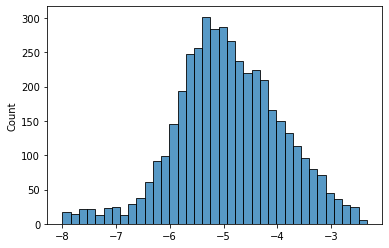

In [139]:
sns.histplot(a.flatten())

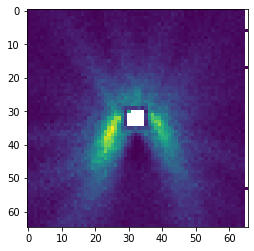

In [140]:
plt.imshow(i_4_plot)

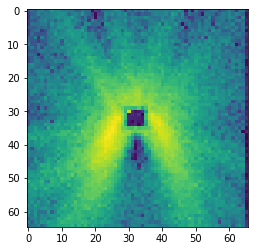

In [141]:
plt.imshow(a)

<AxesSubplot:xlabel='el', ylabel='Count'>

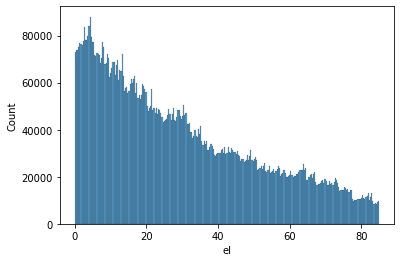

In [145]:
sns.histplot(obs.el)

In [155]:
i_count=collection.create_image(obs.x,obs.y,~obs.z.isna(),0.25,bounds,mean=False)
pd.DataFrame(i_count.flatten()).describe()

,0
count,1085.000000
mean,491.052535
std,444.534559
min,45.000000
25%,250.000000
50%,365.000000
75%,569.000000
max,4449.000000


In [156]:
i_4_rel_plot=collection.create_image(obs.x,obs.y,indicator(obs.z,10,4).astype('int'),0.25,bounds,mean=False)/(i_count+0.01)

(array([ 23., 187., 270., 215., 139., 110.,  58.,  47.,  26.,  10.]),
 array([0.00657888, 0.06057598, 0.11457308, 0.16857018, 0.22256729,
        0.27656439, 0.33056149, 0.3845586 , 0.4385557 , 0.4925528 ,
        0.5465499 ]),
 <BarContainer object of 10 artists>)

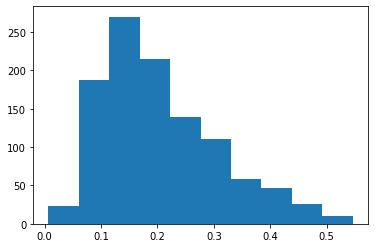

In [157]:
plt.hist(i_4_rel_plot.flatten())

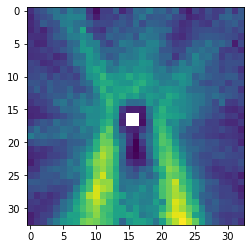

In [158]:
plt.imshow(i_4_rel_plot)

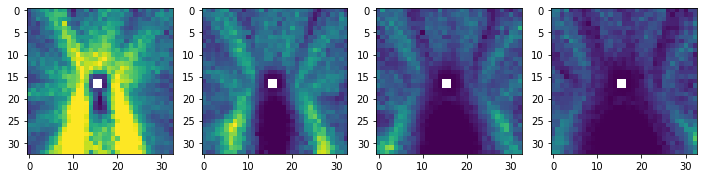

In [165]:
fig,axes=plt.subplots(ncols=4,figsize=(12,4))
for i,h in enumerate([10,20,30,40]):
    axes[i].imshow(collection.create_image(obs.x,obs.y,indicator(obs.z,h,4).astype('int'),0.25,bounds,mean=False)/(i_count+0.01),vmin=0,vmax=0.35)

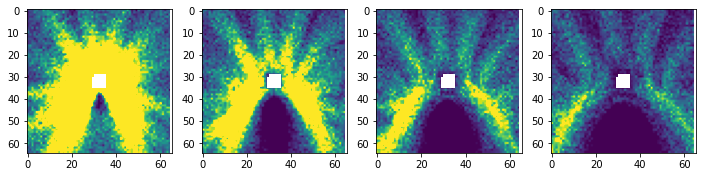

In [167]:
fig,axes=plt.subplots(ncols=4,figsize=(12,4))
for i,h in enumerate([10,20,30,40]):
    axes[i].imshow(collection.create_image(obs.x,obs.y,indicator(obs.z,h,4).astype('int'),0.5,bounds,mean=True),vmin=0,vmax=0.01)

/Users/terrylines/Documents/GNSS/gnssmapper/.venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/terrylines/Documents/GNSS/gnssmapper/.venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/terrylines/Documents/GNSS/gnssmapper/.venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/terrylines/Documents/GNSS/gnssmapper/.venv/lib/python3

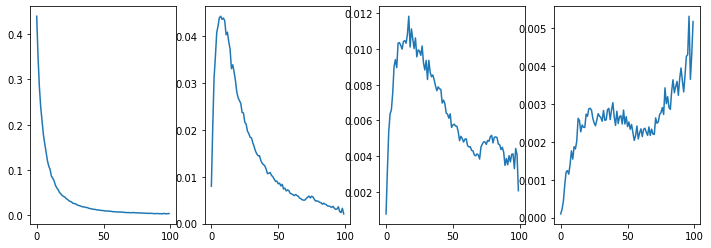

In [169]:
fig,axes=plt.subplots(ncols=4,figsize=(12,4))
for i,h in enumerate([5,10,20,40]):
    axes[i].plot(indicator(obs.z,h,4).astype('int').groupby(pd.cut(obs.d_building,100)).mean())